#PA1: will a customer accept the coupon?

## Load the data and needed modules

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

In [2]:
df = pd.read_csv('./data/coupons.csv')
df.head(n=5) ## show the first 5 rows

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [3]:
df.info() ##show the data types of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
destination             12684 non-null object
passanger               12684 non-null object
weather                 12684 non-null object
temperature             12684 non-null int64
time                    12684 non-null object
coupon                  12684 non-null object
expiration              12684 non-null object
gender                  12684 non-null object
age                     12684 non-null object
maritalStatus           12684 non-null object
has_children            12684 non-null int64
education               12684 non-null object
occupation              12684 non-null object
income                  12684 non-null object
car                     108 non-null object
Bar                     12577 non-null object
CoffeeHouse             12467 non-null object
CarryAway               12533 non-null object
RestaurantLessThan20    12554 non-null object
Restaurant20To50     

##data cleaning

In [4]:
df.isnull().sum() ##show the number of missing values in each column

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [5]:
df.dropna(inplace=True) ##drop rows with missing values

In [6]:
df.isnull().sum() ##check if there are any missing values left

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
car                     0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

In [7]:
df.groupby('Y').mean()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp
Y,,,,,,,
0,63.695652,0.413043,1.0,0.630435,0.108696,0.130435,0.869565
1,62.258065,0.387097,1.0,0.596774,0.145161,0.129032,0.870968


## check the acceptance rate between different groups

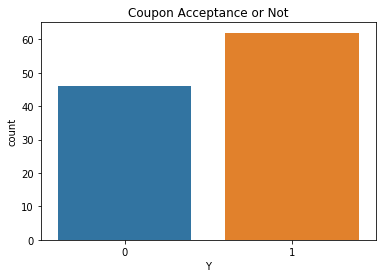

In [8]:
sns.countplot(x='Y', data=df)
plt.title('Coupon Acceptance or Not')
plt.show()

##check acceptance rate across different coupon categories

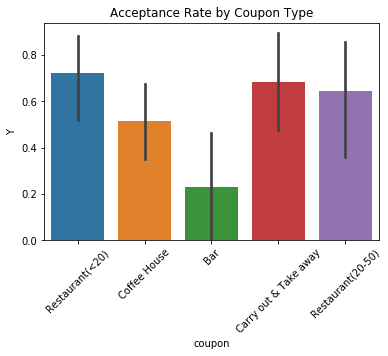

In [9]:
sns.barplot(x='coupon', y='Y', data=df)
plt.xticks(rotation=45)
plt.title('Acceptance Rate by Coupon Type')
plt.show()

## Bar coupon has the lowest acceptance rate and Restaurant(<20) (Less expensive restaurants (under $20)) coupon has the highest acceptance rate

## check if the acceptance rate is different between different genders

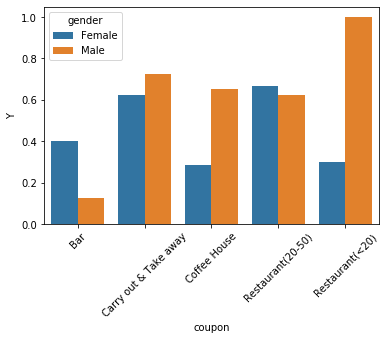

In [10]:
acceptance_rate_by_gender = df.groupby(['coupon', 'gender'])['Y'].mean().reset_index()
plt.xticks(rotation=45)
sns.barplot(x='coupon', y='Y', hue='gender', data=acceptance_rate_by_gender)

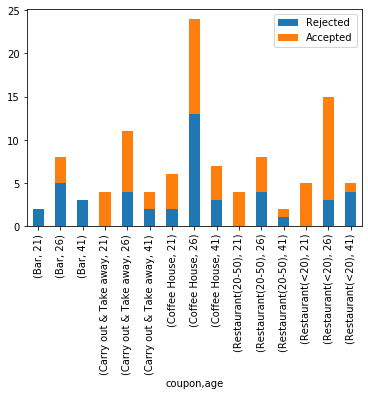

In [11]:
# Group by 'coupon' and 'age', then check the acceptance rate for each group
acceptance_age = df.groupby(['coupon', 'age'])['Y'].value_counts(normalize=False).unstack().fillna(0)
acceptance_age.columns = ['Rejected', 'Accepted']
acceptance_age = acceptance_age.reset_index()
acceptance_age.set_index(['coupon', 'age'], inplace=True)
acceptance_age.plot(kind='bar', stacked=True)

## It suggests that Bar coupon is more popular among Age 26, while Restaurant coupon and Carry out & Take away are more popular among young people.

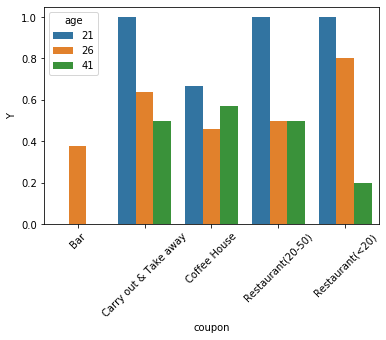

In [12]:
##calculate acceptance rate by age group
acceptance_rate_by_age = df.groupby(['coupon', 'age'])['Y'].mean().reset_index()
plt.xticks(rotation=45)
sns.barplot(x='coupon', y='Y', hue='age', data=acceptance_rate_by_age)

##check if the acceptance rate is different between gender groups

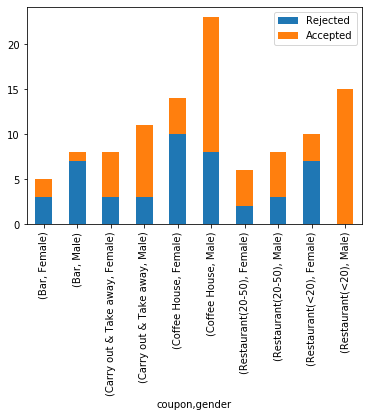

In [13]:
# Group by 'coupon' and 'gender', then check the acceptance rate for each group
acceptance_gender = df.groupby(['coupon', 'gender'])['Y'].value_counts(normalize=False).unstack().fillna(0)
acceptance_gender.columns = ['Rejected', 'Accepted']
acceptance_gender = acceptance_gender.reset_index()
acceptance_gender.set_index(['coupon', 'gender'], inplace=True)
acceptance_gender.plot(kind='bar', stacked=True)

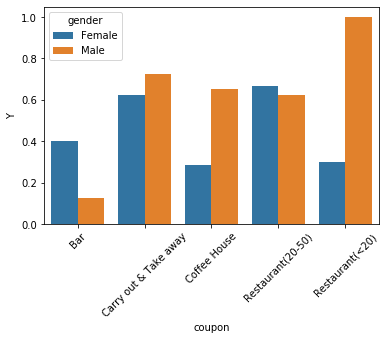

In [14]:
##calculate acceptance rate by gender group
acceptance_rate_by_gender = df.groupby(['coupon', 'gender'])['Y'].mean().reset_index()
plt.xticks(rotation=45)
sns.barplot(x='coupon', y='Y', hue='gender', data=acceptance_rate_by_gender)

## Male is easier to accept the Bar coupon, while female is easier to accept the Less Expensive Restaurant coupon

##check if the acceptance rate is different between different marital status

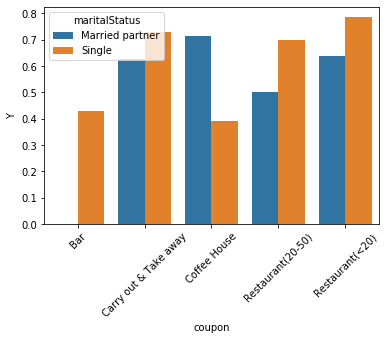

In [15]:
acceptance_rate_by_maritalStatus = df.groupby(['coupon', 'maritalStatus'])['Y'].mean().reset_index()
plt.xticks(rotation=45)
sns.barplot(x='coupon', y='Y', hue='maritalStatus', data=acceptance_rate_by_maritalStatus)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

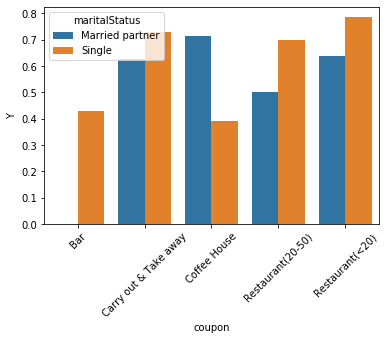

In [16]:
##check if there is a significant difference in acceptance rate between different marital status groups
sns.barplot(x='coupon', y='Y', hue='maritalStatus', data=df.groupby(['coupon', 'maritalStatus'])['Y'].mean().reset_index())
plt.xticks(rotation=45)


##single people is easier to accept the Bar coupon

##check if there is a significant difference in acceptance rate between different time groups

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

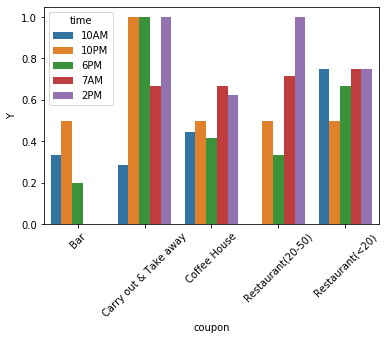

In [17]:
##check if there is a significant difference in acceptance rate between different time groups
sns.barplot(x='coupon', y='Y', hue='time', data=df.groupby(['coupon', 'time'])['Y'].mean().reset_index())
plt.xticks(rotation=45)

##check if there is a difference in acceptance rate between different temperature groups

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

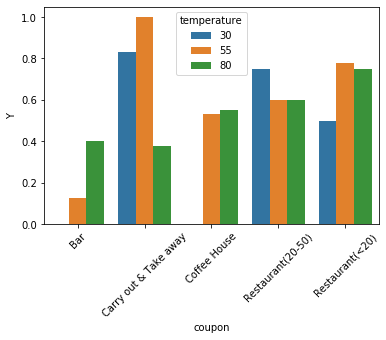

In [18]:
##check if there is a significant difference in acceptance rate between different temperature groups
sns.barplot(x='coupon', y='Y', hue='temperature', data=df.groupby(['coupon', 'temperature'])['Y'].mean().reset_index())
plt.xticks(rotation=45)

##when the temperature is quite low, people do not accept the Bar coupon and Coffer House coupon

##check if there is a difference in acceptance rate between different passanger groups

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

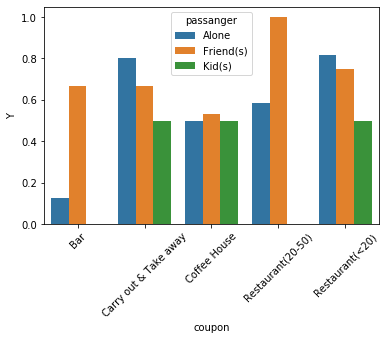

In [19]:
##check if there is a significant difference in acceptance rate between different passanger groups
sns.barplot(x='coupon', y='Y', hue='passanger', data=df.groupby(['coupon', 'passanger'])['Y'].mean().reset_index())
plt.xticks(rotation=45)

##kids do not accept bar coupons and expensive restaurant coupons. people with friends are easier to accept bar coupons and expensive restaurant coupons.

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

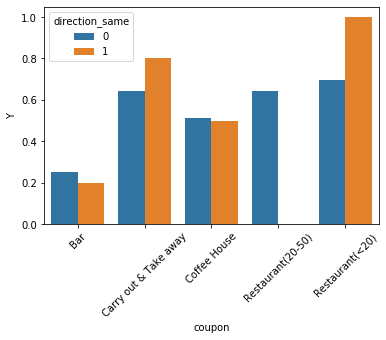

In [20]:
##check if there is a significant difference in acceptance rate between different direction groups
sns.barplot(x='coupon', y='Y', hue='direction_same', data=df.groupby(['coupon', 'direction_same'])['Y'].mean().reset_index())
plt.xticks(rotation=45)

##check if there is a difference in acceptance rate between different weather groups

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

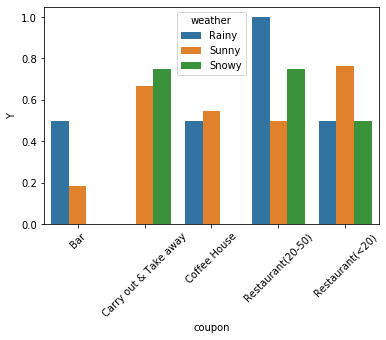

In [21]:
##check if there is a significant difference in acceptance rate between different weather groups
sns.barplot(x='coupon', y='Y', hue='weather', data=df.groupby(['coupon', 'weather'])['Y'].mean().reset_index())
plt.xticks(rotation=45)

##when it is snowing, people are unlikely to accept the bar coupon and unlikely to accept the coffee house coupon;
##when it is raining, people are unlikely to accept the carry out & take away coupon